- By: Alex Kwon
- Email: alex.kwon [at] hudsonthames [dot] org

# Online Portfolio Selection

## OLPS Strategies

[**Benchmarks**](https://github.com/hudson-and-thames/research/blob/master/Online%20Portfolio%20Selection/Introduction%20to%20Online%20Portfolio%20Selection.ipynb)

[**Momentum**](https://github.com/hudson-and-thames/research/blob/master/Online%20Portfolio%20Selection/Online%20Portfolio%20Selection%20-%20Momentum.ipynb)

[**Mean Reversion**](https://github.com/hudson-and-thames/research/blob/master/Online%20Portfolio%20Selection/Online%20Portfolio%20Selection%20-%20Mean%20Reversion.ipynb)

[**Pattern Matching**](https://github.com/hudson-and-thames/research/blob/master/Online%20Portfolio%20Selection/Online%20Portfolio%20Selection%20-%20Pattern%20Matching.ipynb)

## Abstract

Online Portfolio Selection is an algorithmic trading strategy that sequentially allocates capital among a group of assets to maximize the final returns of the investment.

Traditional theories for portfolio selection, such as Markowitz’s Modern Portfolio Theory, optimize the balance between the portfolio's risks and returns. However, OLPS is founded on the capital growth theory, which solely focuses on maximizing the returns of the current portfolio.

Through these walkthroughs of different portfolio selection strategies, we hope to introduce a set of different selection tools available for everyone. Most of the works will be based on Dr. Bin Li and Dr. Steven Hoi’s book, *Online Portfolio Selection: Principles and Algorithms*, and further recent papers will be implemented to assist the development and understanding of these unique portfolio selection strategies.

The package and module behind this implementation of OLPS are currently in the works and will be published on MlFinLab soon.

### Important Notes

We will primarily focus on two ideas for the implementation of these strategies.

1. Online Learning
    - Algorithms should be optimized to backtest years of data without any problems
2. Intuitive user experience
    - Simple methods that will allow the users to easily interact with the data of their choice

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlfinlab.online_portfolio_selection.benchmarks import *

## Import Data

We will use the ETF data included in the MlFinLab library for analysis. This includes 23 ETF's with closing prices from 2008 to 2016.

In [2]:
stock_prices = pd.read_csv('../../mlfinlab/mlfinlab/tests/test_data/stock_prices.csv', parse_dates=True, index_col='Date')
stock_prices = stock_prices.dropna(axis=1)

In [3]:
stock_prices.head()

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,49.273335,35.389999,106.639999,52.919998,78.220001,87.629997,37.939999,47.759998,41.299999,79.500000,...,42.090000,51.173328,55.983330,74.529999,67.309998,144.929993,94.379997,77.360001,101.400002,130.630005
2008-01-03,49.716667,35.290001,107.000000,53.119999,78.349998,87.809998,37.919998,48.060001,42.049999,80.440002,...,42.029999,51.293331,55.599998,74.800003,67.500000,144.860001,94.250000,77.459999,101.519997,130.740005
2008-01-04,48.223331,34.599998,106.970001,51.759998,76.570000,88.040001,36.990002,46.919998,40.779999,77.500000,...,42.349998,49.849998,54.536671,72.980003,65.769997,141.309998,94.269997,77.550003,101.650002,128.169998
2008-01-07,48.576668,34.630001,106.949997,51.439999,76.650002,88.199997,37.259998,47.060001,40.220001,77.199997,...,43.230000,50.416672,56.116669,72.949997,65.650002,141.190002,94.680000,77.570000,101.720001,128.059998
2008-01-08,48.200001,34.389999,107.029999,51.320000,76.220001,88.389999,36.970001,46.400002,39.599998,75.849998,...,43.240002,49.566669,55.326672,72.400002,65.360001,138.910004,94.570000,77.650002,101.739998,125.849998


## Problem Formulation

### Price: $p_t$

The price of the data is inputted by the user. Asset $i$'s price at time $t$ will be referred to as $p_{t,i}$.

### Price Relative: $x_t = \frac{p_t}{p_{t-1}}$

The price relative is calculated by taking the ratio of the current time's price to the last time's price.

Asset $i$'s price relative at time $t$ will be referred to as $x_{t,i}$.

### Portfolio Weight: $b_t$

The portfolio weights represent the allocation of capital to a particular asset.

We will assume that the weights are non-negative and that sum of the weight is one, which will simulate a long-only, no leverage environment.

### Portfolio Return: $S_t = S_0\overset{t}{\underset{i=0}{\prod}} x_i \cdot b_i$

The cumulative portfolio returns will be calculated by taking the product of all previous returns.

$S_0$ represents the initial capital, and each dot product of price relative and portfolio weights represent the increase in capital for a particular time period.

## Benchmarks

Before we dive into the more interesting and complex models of portfolio selection, we will begin our analysis with benchmarks. As unappealing as benchmarks are, traditional strategies such as tracking the S&P 500 have been hugely successful.

Typically these are implemented in hindsight, so future data is often incorporated within the selection algorithm. For real-life applications, we do not have access to future data from the present, so strategies here should be taken with a grain of salt.

## 1. Buy and Hold

Buy and Hold is a strategy where an investor invests in an initial portfolio and never rebalances it. The portfolio weights, however, change as time goes by because the underlying assets change in prices.

Returns for Buy and Hold can be calculated by multiplying the initial weight and the cumulative product of relative returns.

$S_n(BAH(b_1)) = b_1 \cdot \left(\overset{n}{\underset{t=1}{\bigodot}} x_t\right)$

Buy and Hold strategy can be called using **BAH()**.

We can then easily run the algorithm and allocate weights by using the **.allocate()** method.

In [4]:
bah = BAH()
bah.allocate(stock_prices)

Because we didn't specify a weight when we allocated to the strategy, initial weights are uniformly distributed across all the ETF's for time 0.

The weights allocated to this portfolio can be viewed by using **.all_weights** on our portfolio object.

In [5]:
bah.all_weights.head()

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478
2008-01-03,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478
2008-01-04,0.043781,0.043268,0.043537,0.043554,0.043462,0.043479,0.043367,0.043663,0.044178,0.043903,...,0.043328,0.043492,0.043093,0.043547,0.043513,0.043369,0.043331,0.043446,0.043442,0.043427
2008-01-07,0.043220,0.043175,0.044298,0.043193,0.043230,0.044368,0.043055,0.043384,0.043605,0.043050,...,0.044434,0.043019,0.043020,0.043243,0.043151,0.043058,0.044110,0.044270,0.044270,0.043330
2008-01-08,0.043437,0.043114,0.044188,0.042828,0.043176,0.044347,0.043271,0.043415,0.042908,0.042786,...,0.045254,0.043409,0.044165,0.043126,0.042974,0.042923,0.044200,0.044180,0.044199,0.043194


We notice that the weights change over time becase the ETF prices fluctuate.

In [6]:
bah.all_weights.tail()

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-27,0.029938,0.029988,0.049053,0.038726,0.030994,0.057853,0.026079,0.027566,0.050344,0.037951,...,0.054111,0.033364,0.026220,0.026964,0.036475,0.063358,0.064999,0.048883,0.047168,0.060049
2016-06-28,0.029835,0.029540,0.049666,0.038889,0.030689,0.058910,0.025715,0.026721,0.049112,0.037086,...,0.055299,0.032979,0.026381,0.026511,0.036470,0.062817,0.067257,0.049597,0.047586,0.059777
2016-06-29,0.030271,0.029711,0.049119,0.038906,0.031040,0.058051,0.026115,0.027466,0.048818,0.037569,...,0.054705,0.033338,0.026627,0.026986,0.036686,0.063028,0.066426,0.048940,0.046945,0.059817
2016-06-30,0.030720,0.029810,0.048588,0.039013,0.031286,0.057224,0.026305,0.027893,0.049138,0.037890,...,0.054294,0.033510,0.026832,0.027253,0.036800,0.063446,0.065243,0.048423,0.046487,0.060166
2016-07-01,0.030727,0.029944,0.048208,0.038302,0.031445,0.056796,0.026561,0.028361,0.049441,0.037823,...,0.054931,0.033754,0.026934,0.027586,0.036483,0.063689,0.064849,0.048017,0.046102,0.060380


The cumulative returns for the portfolio can be called using **.portfolio_return**

In [7]:
bah.portfolio_return

,Returns
Date,
2008-01-02,1.000000
2008-01-03,1.002028
2008-01-04,0.984536
2008-01-07,0.986788
2008-01-08,0.977662
...,...
2016-06-27,0.953233
2016-06-28,0.967172
2016-06-29,0.977161


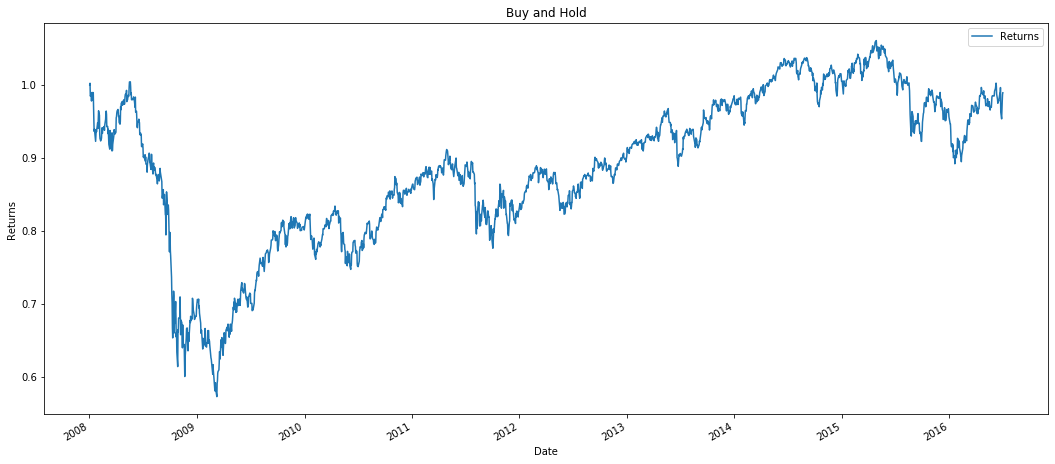

In [8]:
bah.portfolio_return.plot(title='Buy and Hold',figsize=(18,8)).set_ylabel('Returns');

With the crash in 2009, Buy and Hold strategies have returned almost the same returns from the initial allocation. The results would vary depending on the initial weights of stock that we would have used, but initial analysis that uses uniform weights indicates that Buy and Hold has been an unprofitable portfolio for this set of assets.

In the event that we would like to allocate a predetermined set of weights to a portfolio, we can initialize the weights as well. For this, we will allocate 0.5 to the first asset and 0.5 to the second asset.

In [9]:
half_and_half = np.zeros(stock_prices.shape[1])
half_and_half[[0,1]] = 0.5
half_and_half

array([0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

In [10]:
half_and_half_bah = BAH()
half_and_half_bah.allocate(stock_prices, weights=half_and_half)

In [11]:
half_and_half_bah.all_weights

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,0.500000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-03,0.500000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-04,0.502947,0.497053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-07,0.500259,0.499741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-08,0.501867,0.498133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,0.499579,0.500421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-28,0.502483,0.497517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-29,0.504671,0.495329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Initially, the stock prices are exactly split in half, but we see that after the first two days the prices diverge in different directions. Although we originally had half of our capital in EEM and EWG, in the end, our portfolio weights have shifted because the underlying prices for EEM and EWG have changed.

## 2. Best Stock

Best Stock strategy chooses the best performing asset in hindsight.

The best performing asset is determined with an argmax equation stated below. The portfolio selection strategy searches for the asset that increases the most in price for the given time period.

$b_0 = \underset{b \in \Delta_m}{\arg\max} \: b \cdot \left(\overset{n}{\underset{t=1}{\bigodot}}  x_t \right)$

Once the initial portfolio has been determined, the final weights can be represented as buying and holding the initial weight.

$S_n(BEST) = \underset{b \in \Delta_m}{\max} b \cdot \left(\overset{n}{\underset{t=1}{\bigodot}}  x_t \right) = S_n(BAH(b_0))$

Best Stock strategy can be called using **BestStock()**.

In [12]:
best_stock = BestStock()
best_stock.allocate(stock_prices)

In [13]:
best_stock.all_weights

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
print(best_stock.all_weights.iloc[-1])

EEM    0.0
EWG    0.0
TIP    0.0
EWJ    0.0
EFA    0.0
IEF    0.0
EWQ    0.0
EWU    0.0
XLB    0.0
XLE    0.0
XLF    0.0
LQD    0.0
XLK    1.0
XLU    0.0
EPP    0.0
FXI    0.0
VGK    0.0
VPL    0.0
SPY    0.0
TLT    0.0
BND    0.0
CSJ    0.0
DIA    0.0
Name: 2016-07-01 00:00:00, dtype: float64


If we examine all of the weights assigned to best_stock, we notice that all the weights are set to 0 except for XLK. For the given period and price data, XLK was the best performing asset, so the portfolio strategy chooses to allocate all of its on weight own XLK.

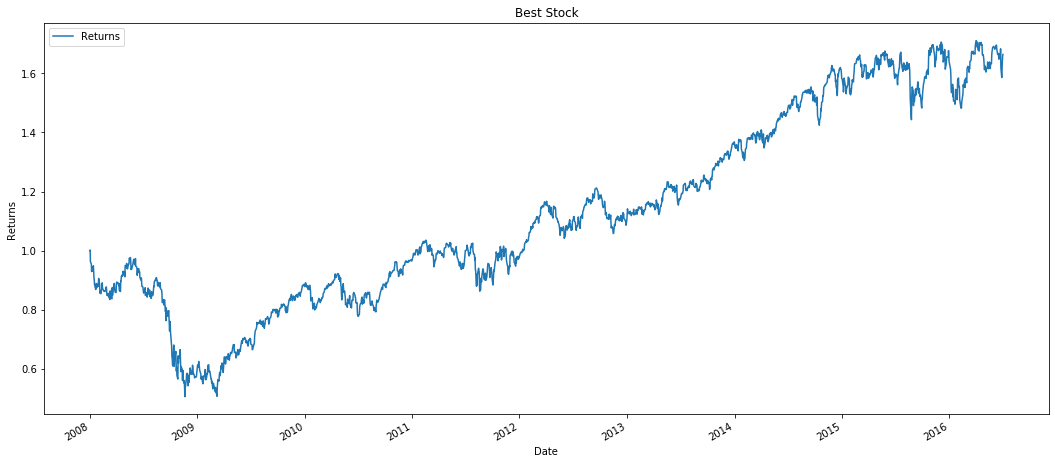

In [15]:
best_stock.portfolio_return.plot(title='Best Stock', figsize=(18,8)).set_ylabel('Returns');

As seen with the above graph, we are directly tracking XLK, the best performing ETF during this period. The same exact graph can be replicated by buying only XLK from the beginning using the Buy and Hold strategy since we are not rebalancing the portfolio.

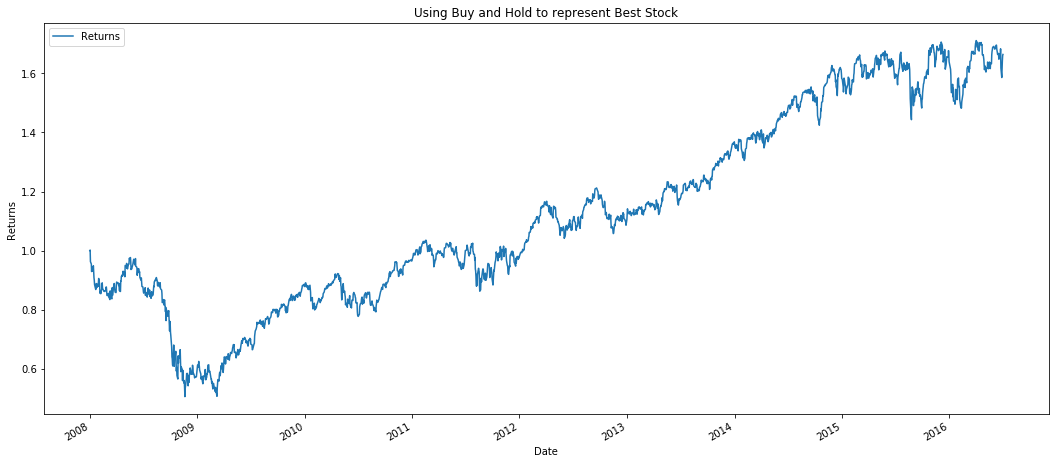

In [16]:
bah_best_stock = BAH()
# buy_XLK represents a portfolio weight with 1 on XLK and 0 otherwise
buy_XLK = np.array(best_stock.all_weights.iloc[0])
bah_best_stock.allocate(stock_prices, weights=buy_XLK)
bah_best_stock.portfolio_return.plot(title='Using Buy and Hold to represent Best Stock', figsize=(18,8)).set_ylabel('Returns');

## 3. Constant Rebalanced Portfolio

Constant Rebalanced Portfolio rebalances to a certain portfolio weight every time period. This particular weight can be set by the user, and if there are no inputs, it will automatically allocate equal weights to all assets. The total returns for a CRP can be calculated by taking the cumulative product of the weight and relative returns matrix.

$S_n(CRP(b)) = \overset{n}{\underset{t=1}{\prod}} \:  b^{\top}x_t$

Constant Rebalanced Portfolio can be called with **CRP()**, and the weights can be initiated with CRP(weight=weight). If no weights are specified, it will initialize to uniform weights across all time.

In [17]:
crp = CRP()
crp.allocate(stock_prices)
crp.all_weights

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478
2008-01-03,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478
2008-01-04,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478
2008-01-07,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478
2008-01-08,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478
2016-06-28,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478
2016-06-29,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478


The weights stay constant over the given time period

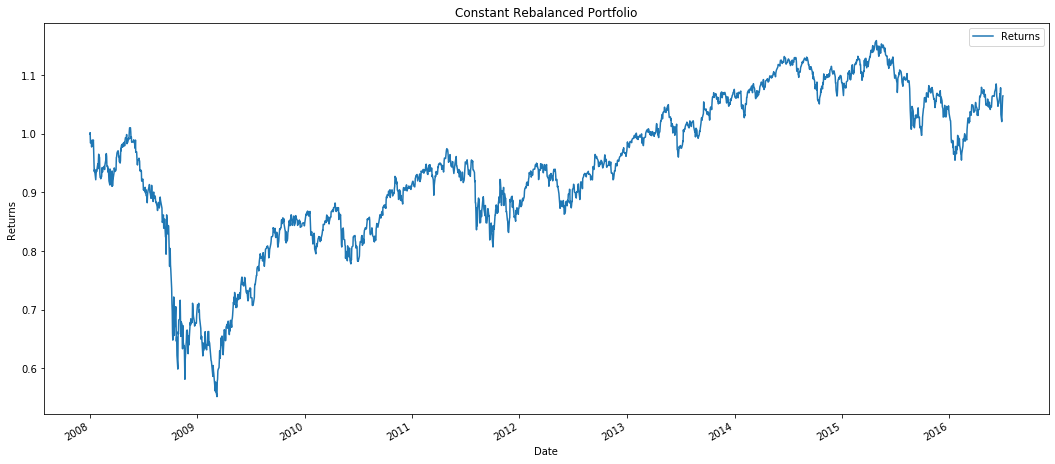

In [18]:
crp.portfolio_return.plot(title='Constant Rebalanced Portfolio', figsize=(18,8)).set_ylabel('Returns');

In a way, CRP performs a passive mean reversion. For the prices that decrease, the following period's weight should decrease. However, by allocating weights to even out and return to the predetermined number, the portfolio consistently shifts weights from increasing assets to decreasing assets. However, the returns portrayed with CRP is disappointing as well. The change from 1.0 to 1.1 over 8 years is not an optimal portfolio.

We will also examine an example of CRP with predetermined weights set by the user. We will use the same weights used in the Buy and Hold strategy that allocates half of the weight to each of the first two assets.

In [19]:
half_and_half

array([0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

In [20]:
half_and_half_crp = CRP(half_and_half)
half_and_half_crp.allocate(stock_prices)

In [21]:
half_and_half_crp.all_weights

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-03,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-04,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-07,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-08,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-28,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-29,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We see that the weights stay constant, which is different from the results from the changing weights of Buy and Hold. The portfolio constantly rebalances itself to the predetermined weight.

## 4. Best Constant Rebalanced Portfolio

Best Constant Rebalanced Portfolio is a strategy that is implemented in hindsight, which is similar to Best Stock. It uses the same weight for all time periods. However, it determines those weights by having the complete market sequence of the past. The objective function for BCRP looks to maximize portfolio returns with the equation below.

$b^{\bf{\star}} = \underset{b^n \in \Delta_m}{\arg\max} \: S_n(CRP(b)) = \underset{b \in \Delta_m}{\arg\max} \overset{n}{\underset{t=1}{\prod}} \:  b^{\top}x_t$

Once the optimal weight has been determined, the final returns can be calculated by using the CRP returns equation.

$S_n(BCRP) = \underset{b \in \Delta_m}{\max} \: S_n(CRP(b)) = S_n(CRP(b^{\bf \star}))$

Best Constant Rebalanced Portfolio strategy can be called with **BCRP()**.

In [22]:
bcrp = BCRP()
bcrp.allocate(stock_prices)

In [23]:
print(bcrp.all_weights.iloc[0])
bcrp.all_weights.iloc[[0,-1]]

EEM    0.000000
EWG    0.000000
TIP    0.000000
EWJ    0.000000
EFA    0.000000
IEF    0.000000
EWQ    0.000000
EWU    0.000000
XLB    0.000000
XLE    0.000000
XLF    0.000000
LQD    0.000000
XLK    0.625272
XLU    0.000000
EPP    0.000000
FXI    0.000000
VGK    0.000000
VPL    0.000000
SPY    0.000000
TLT    0.374728
BND    0.000000
CSJ    0.000000
DIA    0.000000
Name: 2008-01-02 00:00:00, dtype: float64


,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.374728,0.0,0.0,0.0
2016-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.374728,0.0,0.0,0.0


As seen from above, the weights are the same from the beginning of the time period to the end. BCRP returns weights of 0.625272 to XLK, which was the best performing ETF, and 0.374728 to TLT, the second-best performing ETF.

Interestingly, TLT tracks US Treasury bonds of 20+ years and XLK tracks the S&P 500 technology sector. There might be a passive mean reversion with these two assets that allow the Constantly Rebalanced Portfolio to produce returns that are higher than the Best Stock of XLK.

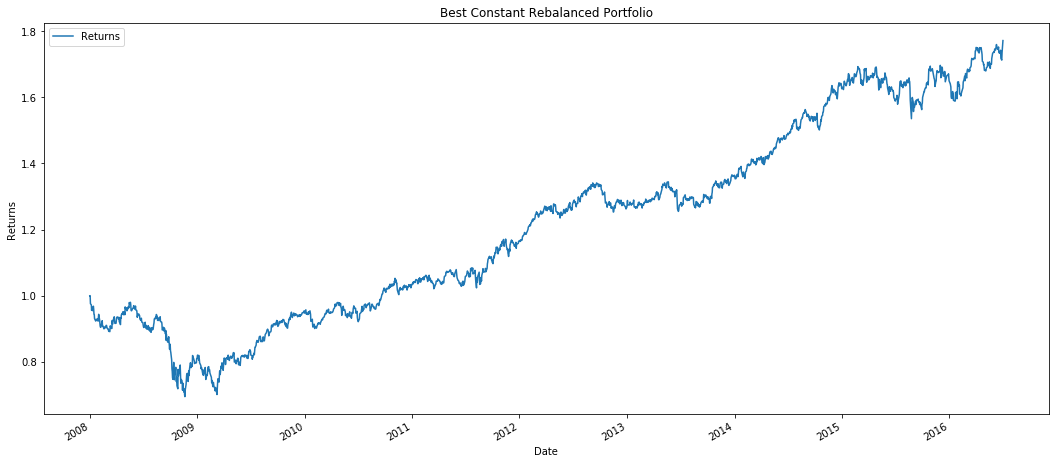

In [24]:
bcrp.portfolio_return.plot(title='Best Constant Rebalanced Portfolio', figsize=(18,8)).set_ylabel('Returns');

BCRP achieves higher returns than any other portfolio that we have seen so far. However, this is primarily due to the fact that we had the data of the complete market sequence. This is impossible to implement in the real market, but it is a good benchmark to keep in hand as we implement other strategies. For other portfolios and the given dataset, we should look to perform better than the 1.8 given with BCRP strategy.

On another note, our strategies can be resampled to a given time period if we want to simulate a portfolio manager's monthly rebalancing or if we want to minimize our transaction costs. They can be called using **.allocate(resample_by='time')**

In [25]:
monthly_bcrp = BCRP()
# 'M' represents monthly rebalancing
monthly_bcrp.allocate(stock_prices, resample_by='M')
print(monthly_bcrp.all_weights.iloc[0])

EEM    0.00000
EWG    0.00000
TIP    0.00000
EWJ    0.00000
EFA    0.00000
IEF    0.00000
EWQ    0.00000
EWU    0.00000
XLB    0.00000
XLE    0.00000
XLF    0.00000
LQD    0.00000
XLK    0.89725
XLU    0.00000
EPP    0.00000
FXI    0.00000
VGK    0.00000
VPL    0.00000
SPY    0.00000
TLT    0.10275
BND    0.00000
CSJ    0.00000
DIA    0.00000
Name: 2008-01-31 00:00:00, dtype: float64


The weights have changed to 0.89725 of XLK and 0.10275 TLT as we are now resampling on a monthly basis.

In [26]:
monthly_bcrp.all_weights

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.10275,0.0,0.0,0.0
2008-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.10275,0.0,0.0,0.0
2008-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.10275,0.0,0.0,0.0
2008-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.10275,0.0,0.0,0.0
2008-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.10275,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.10275,0.0,0.0,0.0
2016-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.10275,0.0,0.0,0.0
2016-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.10275,0.0,0.0,0.0


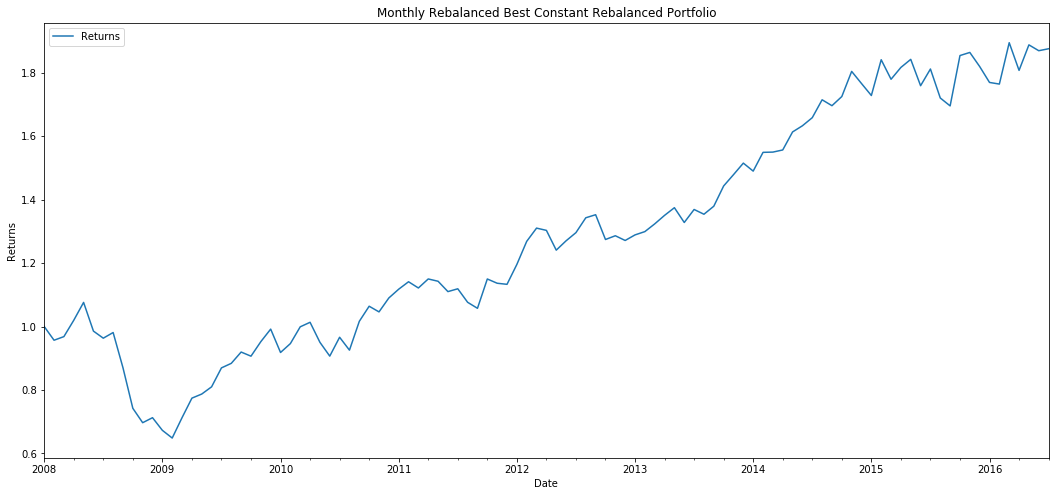

In [27]:
monthly_bcrp.portfolio_return.plot(title='Monthly Rebalanced Best Constant Rebalanced Portfolio', figsize=(18,8)).set_ylabel('Returns');

The graph is smoother compared to the daily rebalanced portfolio, and we actually achieve higher returns than the daily rebalanced one by a marginal amount. The monthly rebalancing most likely reduces market noise and follows the traditional mean reversion method to account for the best possible portfolio.

## Conclusion

Through this notebook, we were able to explore the basic functionalities of MlFinLab's newest Online Portfolio Selection module. Readers were exposed to a basic introduction to the OLPS Benchmarks and will be able to replicate results using the simple methods of the new module.

The next notebook will focus on Exponential Gradient, a momentum strategy.

If you enjoyed reading this please remember to leave us a star on [GitHub](https://github.com/hudson-and-thames) and become a sponsor on [Patreon](https://www.patreon.com/HudsonThames) to have exclusive access to our Slack channel!

- Reference: [Online Portfolio Selection](https://books.google.com/books/about/Online_Portfolio_Selection.html?id=R2fdCgAAQBAJ) by Dr. Bin Li and Dr. Steven Hoi